Candle Chart

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# for interactive charts, change to 'default'
# or use any method available in 'plotly renderers wiki'
render = 'png'

In [2]:
import pandas as pd

df_ticks = pd.read_parquet(f"data/US30_T1_2025_cT.parquet")
df_ticks.rename(columns={'bid': 'close'}, inplace=True)

df_ticks.head()
len(df_ticks)

,ask,close,spread
datetime,,,
2025-05-15 00:00:00.650,41839.4,41838.3,1.1
2025-05-15 00:00:01.002,41839.8,41838.7,1.1
2025-05-15 00:00:01.252,41840.2,41839.1,1.1
2025-05-15 00:00:01.405,41840.9,41839.8,1.1
2025-05-15 00:00:01.658,41840.6,41839.5,1.1


180399

In [3]:
df_ohlc = pd.read_parquet(f"data/US30_1Minute_2025_cT.parquet")
df_ohlc = df_ohlc.resample('5min').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum',
})

df_ohlc.head()
len(df_ohlc)

,open,high,low,close,volume
datetime,,,,,
2025-05-15 00:00:00,41838.7,41858.6,41833.8,41853.5,414.0
2025-05-15 00:05:00,41855.3,41865.3,41854.2,41865.3,207.0
2025-05-15 00:10:00,41866.8,41869.2,41859.9,41862.0,263.0
2025-05-15 00:15:00,41862.3,41867.7,41860.8,41867.5,267.0
2025-05-15 00:20:00,41867.3,41872.8,41866.4,41871.8,170.0


539

In [4]:
from order_flow_aggregated import OrderFlowAggregated
odft = OrderFlowAggregated(df_ohlc, df_ticks, 10, is_open_time=True)

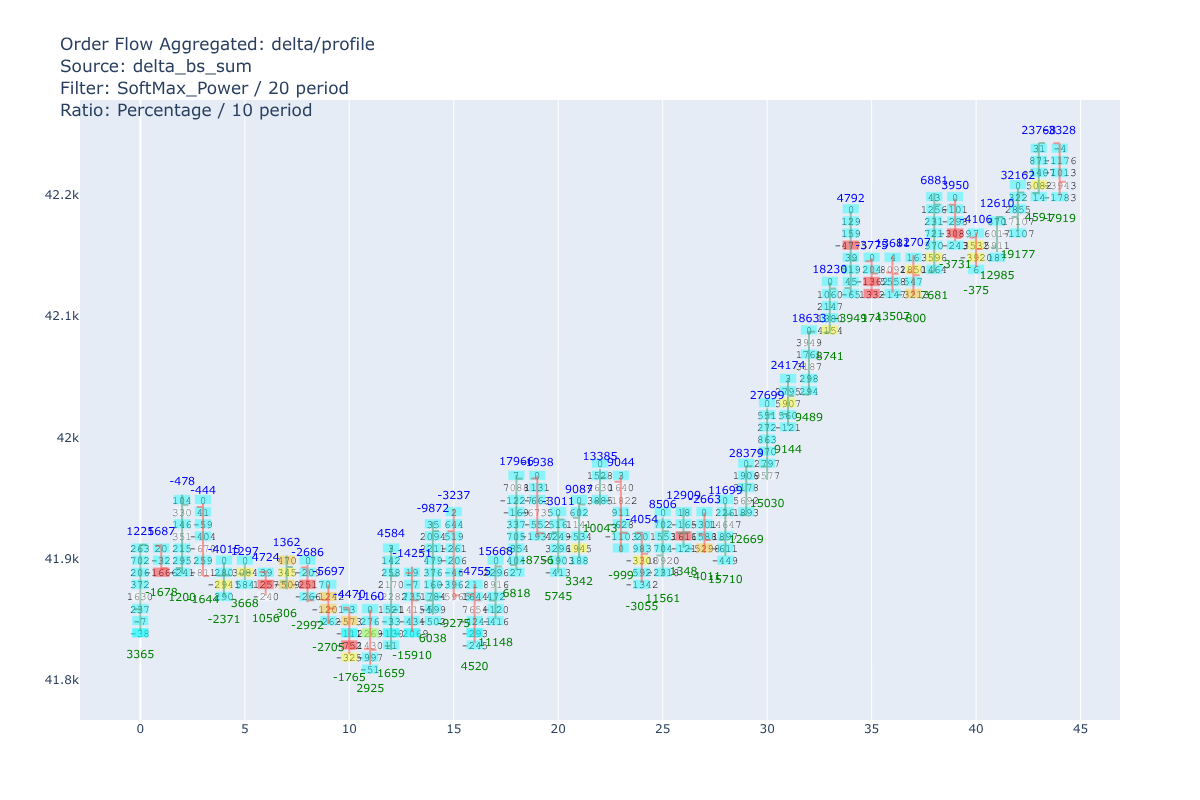

In [5]:
from order_flow_aggregated import SpikePlot
plot_params = SpikePlot(spike_chart=True)
odft.plot([150, 195], mode='delta', chart='ohlc', spike_plot=plot_params, renderer=render)

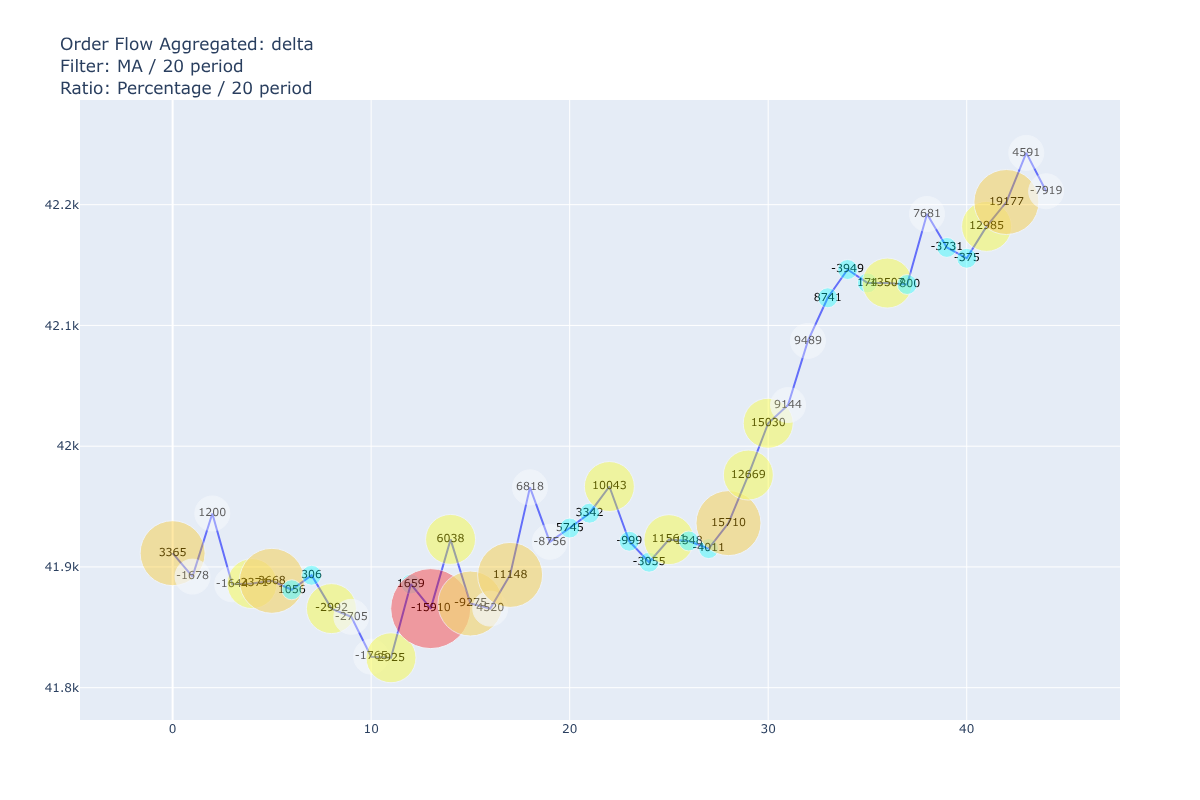

In [6]:
odft.plot_bubbles([150, 195], 'delta', 'heatmap', renderer=render)

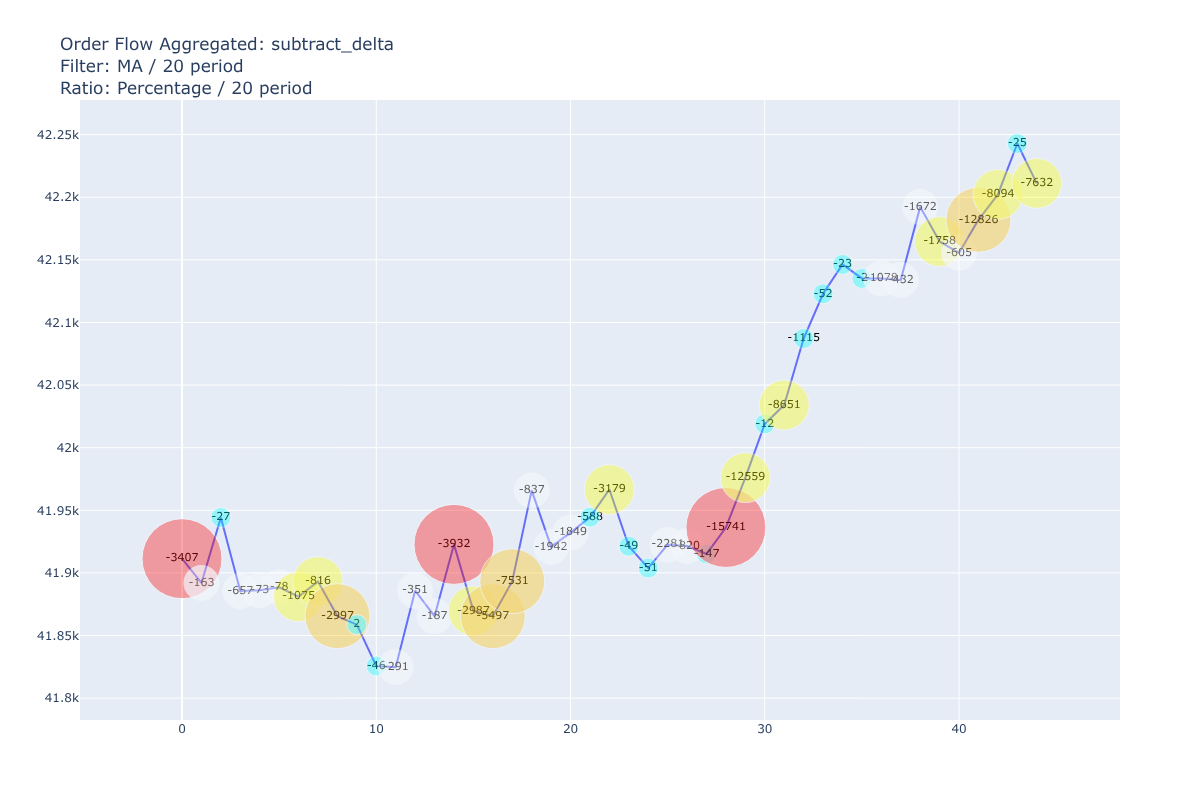

In [7]:
odft.plot_bubbles([150, 195], 'subtract', 'heatmap', renderer=render)
# other sources ['sum', bs_sum']

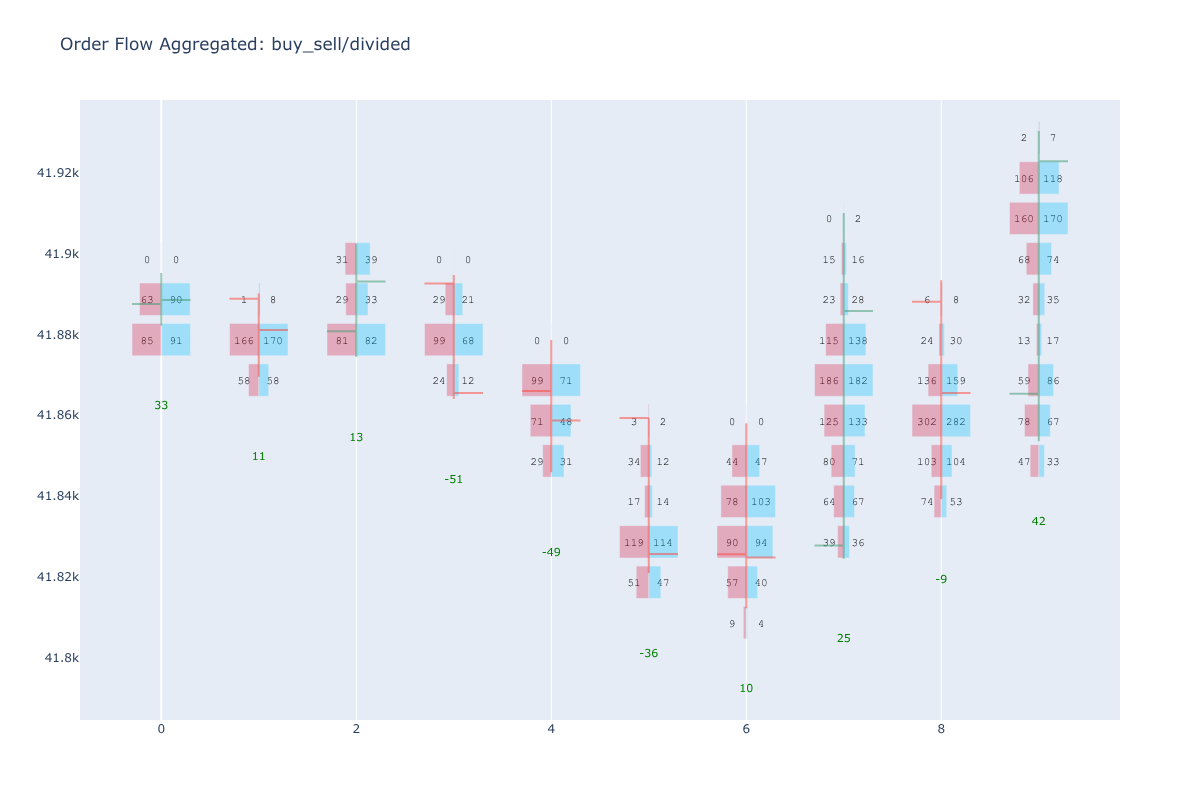

In [8]:
odft.plot([155, 165],mode='buy_sell', view='divided', chart='ohlc', renderer=render)

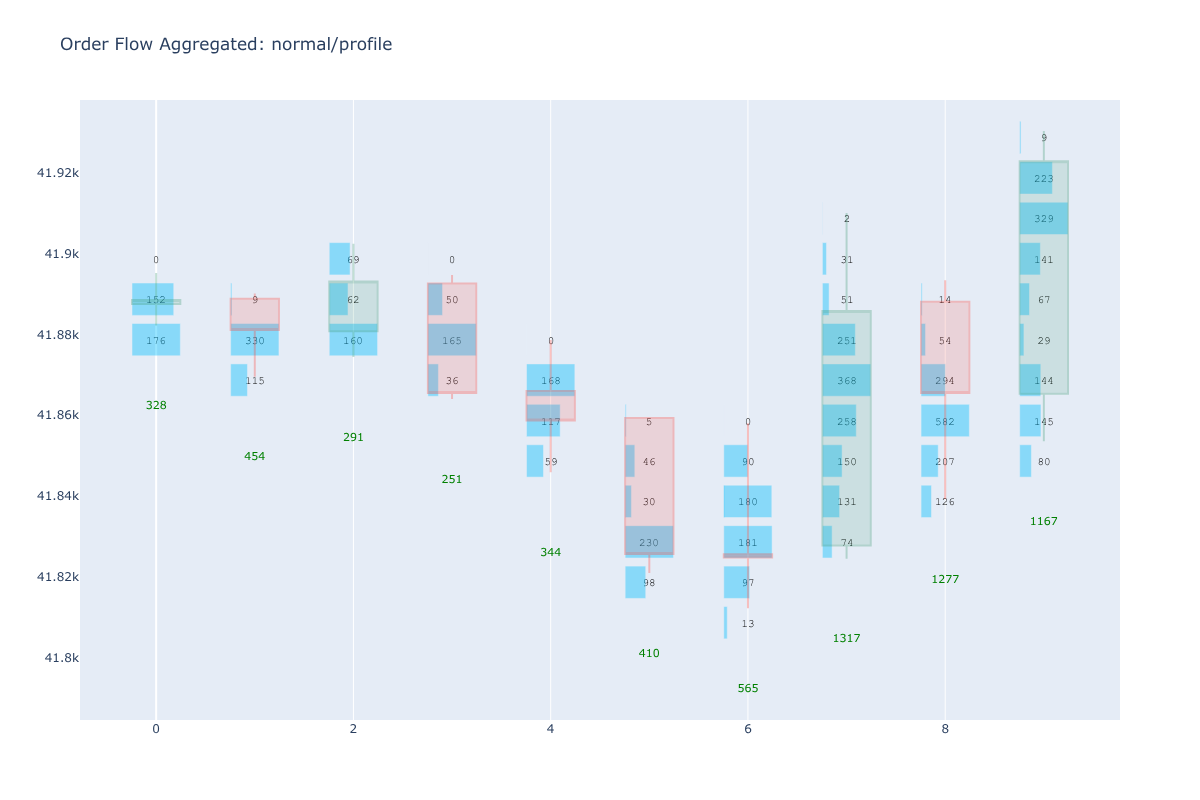

In [9]:
odft.plot([155, 165], mode='normal', chart='candle', renderer=render)

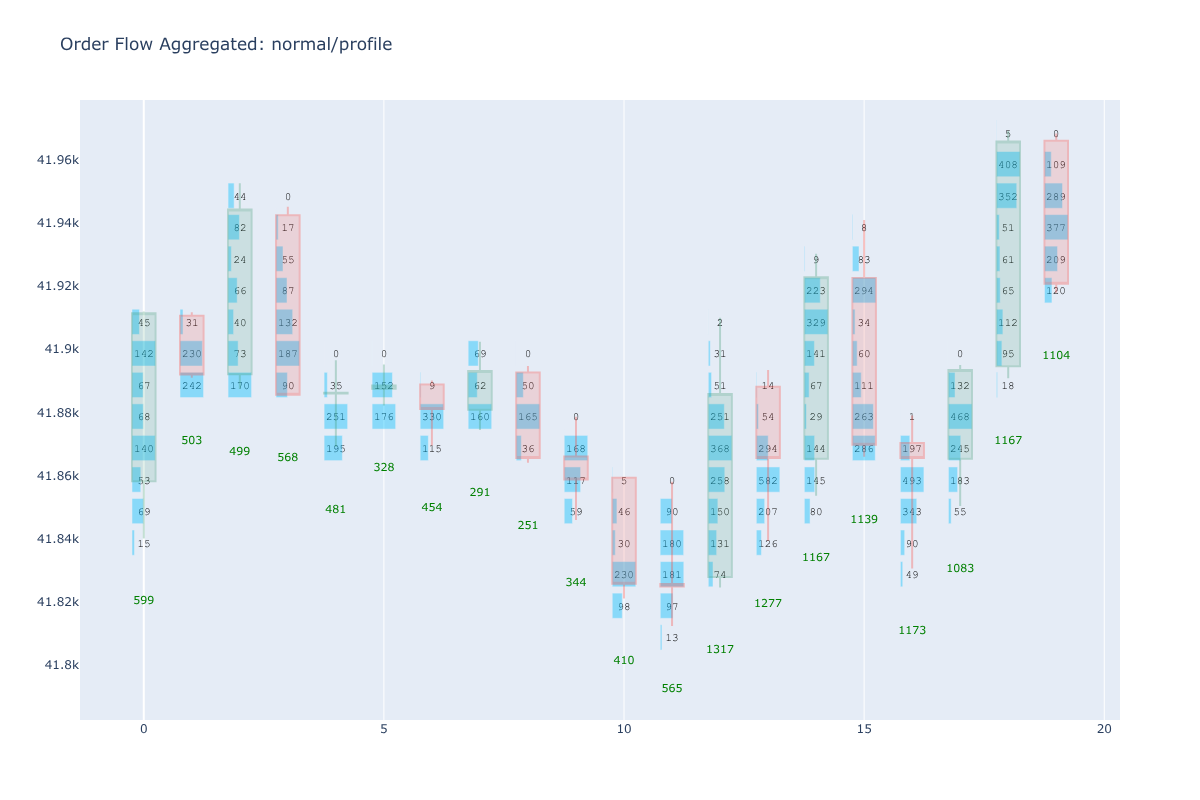

In [10]:
odft.plot([150, 170], mode='normal', chart='candle', renderer=render)